In [202]:
import TMQGP as tm
import QuarkTM
import tqdm
from numpy import *

import h5py

import matplotlib
matplotlib.style.use('publication23')

In [203]:
erange = linspace(-5, 5, 201)
qrange = linspace(0, 5, 51)

In [204]:
mQ = 0.6

In [236]:
df = h5py.File('/home/const/Numerics/TMQGP/ipy/TMQGP/test/FitChi2/4ch_HI/0.00/data_single_170.hdf5')

Gtab = array(df['Q']['G'])
Stab = array(df['Q']['S'])

In [237]:
pt1 = QuarkTM.Particle(mQ, qrange, erange, Gtab=Gtab, S=Stab)

In [238]:
T = 0.2

In [239]:
ch_conv = QuarkTM.Channel(pt1, pt1, T, ImMode=0, expand=0)
ch_int = QuarkTM.Channel(pt1, pt1, T, ImMode=1, expand=0)

[]

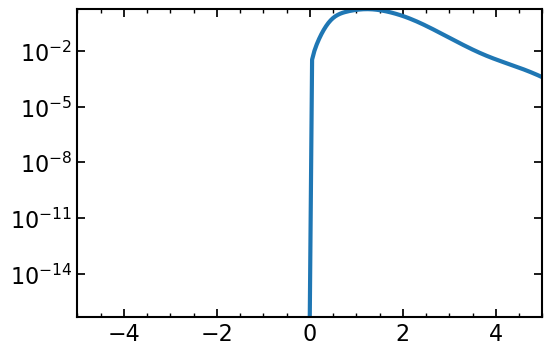

In [240]:
plt.plot(ch_conv.erange, -ch_conv.ImG2[:, 0])
plt.semilogy()

In [241]:
im2 = array([tm.G2_conv_ff_pole(e, 0, T, pt1.R, pt1.R, Lambda=10) for e in ch_conv.erange])

[]

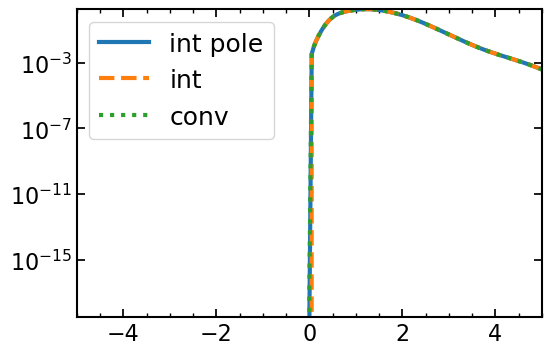

In [242]:
plt.plot(ch_conv.erange, pi*im2, label='int pole')
plt.plot(ch_int.erange, -ch_int.ImG2[:, 0], ls='--', label='int')
plt.plot(ch_conv.erange, -ch_conv.ImG2[:, 0], ls=':', label='conv')

plt.legend()
plt.semilogy()

## Test the quasiparticle case

In [244]:
T = 0.2

In [245]:
ch_conv = QuarkTM.Channel(pt1, pt1, T, ImMode=0, expand=0)
ch_int = QuarkTM.Channel(pt1, pt1, T, ImMode=1, expand=0)

[]

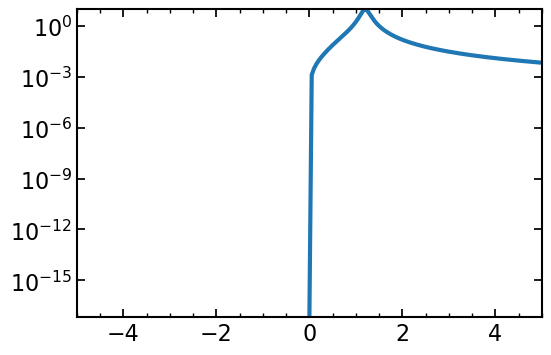

In [246]:
plt.plot(ch_conv.erange, -ch_conv.ImG2[:, 0])
plt.semilogy()

In [247]:
im2 = array([tm.G2_conv_ff_pole(e, 3, T, pt1.R, pt1.R, Lambda=10) for e in ch_conv.erange])

[]

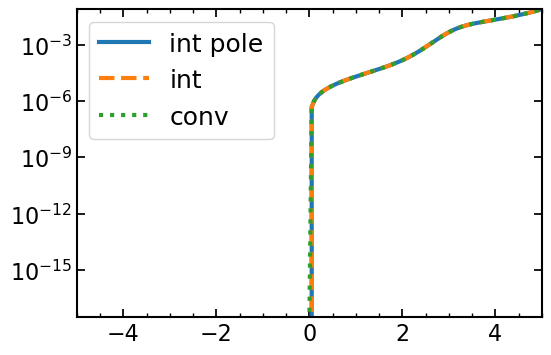

In [217]:
plt.plot(ch_conv.erange, pi*im2, label='int pole')
plt.plot(ch_int.erange, -ch_int.ImG2[:, 30], ls='--', label='int')
plt.plot(ch_conv.erange, -ch_conv.ImG2[:, 30], ls=':', label='conv')

plt.legend()
plt.semilogy()

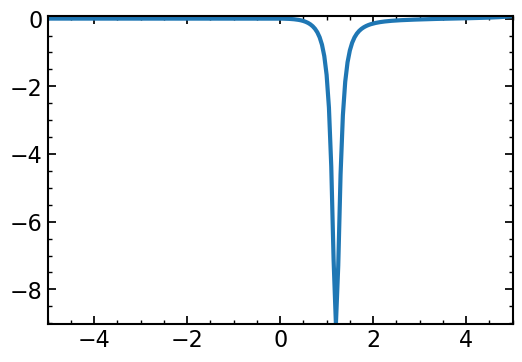

In [218]:
plt.plot(ch_conv.erange, pi*im2 + ch_int.ImG2[:, 0])

### As a function of `q`

In [219]:
e = 5
i_e = argmin(abs(ch_conv.erange - e))

In [220]:
im2_q = array([tm.G2_conv_ff_pole(e, q, T, pt1.R, pt1.R) for q in ch_conv.qrange])

In [221]:
im2_q.shape

(51,)

[]

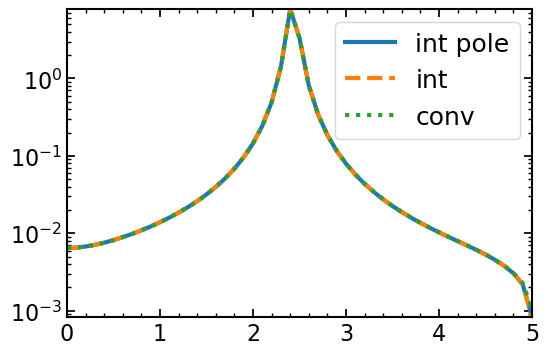

In [222]:
plt.plot(ch_conv.qrange, pi*im2_q, label='int pole')
plt.plot(ch_int.qrange, -ch_int.ImG2[i_e, :], ls='--', label='int')
plt.plot(ch_conv.qrange, -ch_conv.ImG2[i_e, :], ls=':', label='conv')

plt.legend()
plt.semilogy()

## Expanded version

In [266]:
pt1 = QuarkTM.Particle(mQ, qrange, erange, Gtab=Gtab, S=Stab)

In [267]:
T = 0.2

In [308]:
# ch_conv = QuarkTM.Channel(pt1, pt1, T, ImMode=0, expand=1)
ch_int_exp = QuarkTM.Channel(pt1, pt1, T, ImMode=1, expand=1)

In [309]:
im2 = array([tm.G2_conv_ff_pole(e, 0, T, pt1.R, pt1.R, Lambda=10) for e in ch_int_exp.erange])

[]

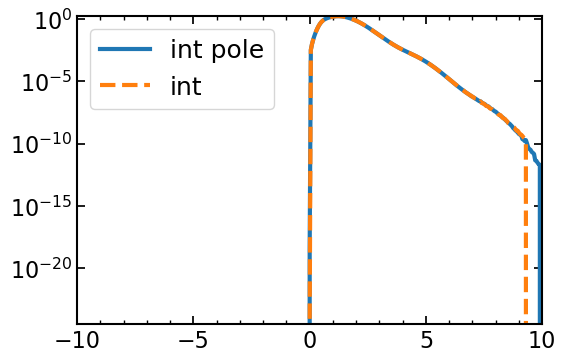

In [310]:
plt.plot(ch_int_exp.erange, pi*im2, label='int pole')
plt.plot(ch_int_exp.erange, -ch_int.ImG2[:, 0], ls='--', label='int')
# plt.plot(ch_conv.erange, -ch_conv.ImG2[:, 0], ls=':', label='conv')

plt.legend()
plt.semilogy()

## Real part as a function of q

In [313]:
e = 3.5
i_e_exp = argmin(abs(ch_int_exp.erange - e))

In [314]:
im2_q = array([tm.G2_conv_ff_pole(e, q, T, pt1.R, pt1.R) for q in ch_int.qrange])

In [315]:
im2_q.shape

(101,)

[]

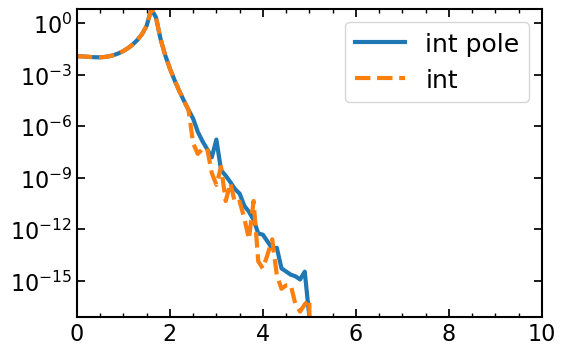

In [316]:
plt.plot(ch_int_exp.qrange, pi*im2_q, label='int pole')
plt.plot(ch_int_exp.qrange, -ch_int_exp.ImG2[i_e_exp, :], ls='--', label='int')
# plt.plot(ch_conv.qrange, -ch_conv.ImG2[i_e, :], ls=':', label='conv')

plt.legend()
plt.semilogy()

In [320]:
re2 = array([tm.ReG2_pole(e, q, T, pt1.R, pt1.R, Lambda=10) for q in ch_int_exp.qrange])

In [321]:
re2_s = array([tm.ReG2_subtr(e, q, T, pt1.R, pt1.R, Lambda=10) for q in ch_int_exp.qrange])

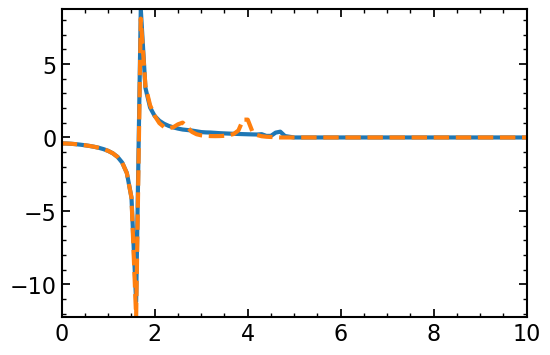

In [323]:
plt.plot(ch_int_exp.qrange, re2)
# plt.plot(ch_int.qrange, -re2_s)
plt.plot(ch_int_exp.qrange, -ch_int_exp.ReG2[i_e_exp, :], ls='--', label='int')

[]

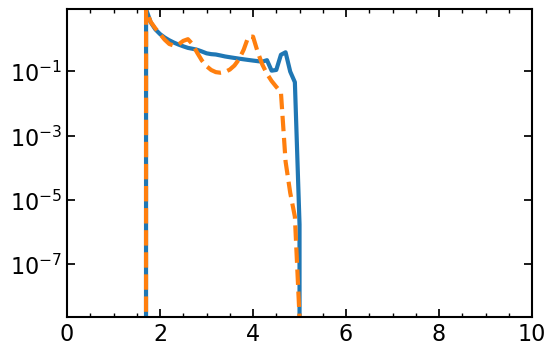

In [325]:
plt.plot(ch_int.qrange, re2)
# plt.plot(ch_int.qrange, -re2_s)
plt.plot(ch_int.qrange, -ch_int.ReG2[i_e_exp, :], ls='--', label='int')

plt.semilogy()

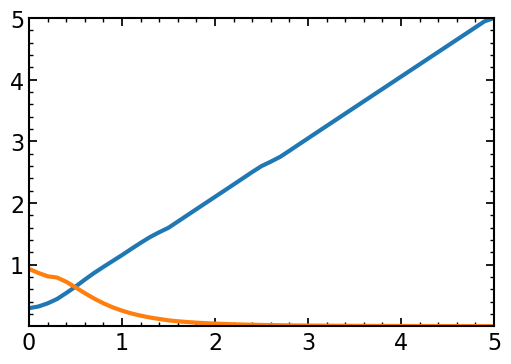

In [294]:
plt.plot(pt1.qrange, pt1.peaks)
plt.plot(pt1.qrange, pt1.widths)

# plt.ylim(0, 2)

In [300]:
pt1.R.iWidth(4.5)

0.002852408044063502